# TAHAP TEXT PRE-PROCESSING

##### Dataset hasil scraping berjumlah 4953 data, menggunakan tools (https://watch.appfollow.io/)

### Tahap Preprocessing 


In [7]:
import pandas as pd
data = pd.read_excel("C:/Users/Widnyana/Documents/SMT 4 WALAWE/TUGAS KLP/PPDM/UTS_C1_PPDM/preprocessing/data_balance.xlsx")
pd.set_option('display.max_colwidth', None)
data

,Review,label
0,Please use another option to verify number than Whatsapp. Message or Phone call may be the option. ( Mohon gunakan opsi lain untuk memverifikasi nomor telepon selain WhatsApp. Tidak semua menggunakan Whatsapp kan?),0
1,Sangat membantu,1
2,Aplikasi banyak bug,0
3,Sangat membantuuuuuuuuuuu.,1
4,Bagus,1
...,...,...
2015,"App ga bermutu..stiap mau diperbaharui ga bisa..app maunya smuanya serba IT, tp sumberdayanya ga siap..TIDAK BERMUTU",0
2016,Aplikasi ANEH!!!!,0
2017,Sejak aplikasi ini di perbaharui jadiatu sehat jadi gk bisa di buka,0
2018,sangat memuaskan,1


### Case Folding (Mengubah data text menjadi lowercase)

In [8]:
data["Review"] = data["Review"].str.lower()
print("Case Folding :\n")
data

Case Folding :



,Review,label
0,please use another option to verify number than whatsapp. message or phone call may be the option. ( mohon gunakan opsi lain untuk memverifikasi nomor telepon selain whatsapp. tidak semua menggunakan whatsapp kan?),0
1,sangat membantu,1
2,aplikasi banyak bug,0
3,sangat membantuuuuuuuuuuu.,1
4,bagus,1
...,...,...
2015,"app ga bermutu..stiap mau diperbaharui ga bisa..app maunya smuanya serba it, tp sumberdayanya ga siap..tidak bermutu",0
2016,aplikasi aneh!!!!,0
2017,sejak aplikasi ini di perbaharui jadiatu sehat jadi gk bisa di buka,0
2018,sangat memuaskan,1


### Tokenization dan Cleaning
#### Pemecahan data text menjadi token dan pembersihan noise data (emoji, simbol, dll)

In [9]:
import string 
import re #regex library

# import word_tokenize & FreqDist from NLTK
from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist


def remove_Reviews_special(text):
    # remove tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # remove non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # remove incomplete URL
    return text.replace("http://", " ").replace("https://", " ")
                
data['Review'] = data['Review'].apply(remove_Reviews_special)

#remove number
def remove_number(text):
    return  re.sub(r"\d+", "", text)

data['Review'] = data['Review'].apply(remove_number)

#remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

data['Review'] = data['Review'].apply(remove_punctuation)

#remove whitespace leading & trailing
def remove_whitespace_LT(text):
    return text.strip()

data['Review'] = data['Review'].apply(remove_whitespace_LT)

#remove multiple whitespace into single whitespace
def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)

data['Review'] = data['Review'].apply(remove_whitespace_multiple)

# remove single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

data['Review'] = data['Review'].apply(remove_singl_char)

# remove repeated characters
def remove_repeated_char(text):
    return re.sub(r'(.)\1+', r'\1', text)

data['Review'] = data['Review'].apply(remove_repeated_char)

# NLTK word rokenize 
def word_tokenize_wrapper(text):
    return word_tokenize(text)

data['Tokenization'] = data['Review'].apply(word_tokenize_wrapper)

print('Hasil Tokenizing dan Cleaning: \n') 
data

Hasil Tokenizing dan Cleaning: 



,Review,label,Tokenization
0,please use another option to verify number than whatsap mesage or phone cal may be the option mohon gunakan opsi lain untuk memverifikasi nomor telepon selain whatsap tidak semua mengunakan whatsap kan,0,"[please, use, another, option, to, verify, number, than, whatsap, mesage, or, phone, cal, may, be, the, option, mohon, gunakan, opsi, lain, untuk, memverifikasi, nomor, telepon, selain, whatsap, tidak, semua, mengunakan, whatsap, kan]"
1,sangat membantu,1,"[sangat, membantu]"
2,aplikasi banyak bug,0,"[aplikasi, banyak, bug]"
3,sangat membantu,1,"[sangat, membantu]"
4,bagus,1,[bagus]
...,...,...,...
2015,ap ga bermutustiap mau diperbaharui ga bisap maunya smuanya serba it tp sumberdayanya ga siaptidak bermutu,0,"[ap, ga, bermutustiap, mau, diperbaharui, ga, bisap, maunya, smuanya, serba, it, tp, sumberdayanya, ga, siaptidak, bermutu]"
2016,aplikasi aneh,0,"[aplikasi, aneh]"
2017,sejak aplikasi ini di perbaharui jadiatu sehat jadi gk bisa di buka,0,"[sejak, aplikasi, ini, di, perbaharui, jadiatu, sehat, jadi, gk, bisa, di, buka]"
2018,sangat memuaskan,1,"[sangat, memuaskan]"


### Normalization (Menormalkan data text untuk konsistensi)

In [10]:
normalizad_word = pd.read_excel("normalisasi.xlsx")

normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

data['Normalization'] = data['Tokenization'].apply(normalized_term)

data

,Review,label,Tokenization,Normalization
0,please use another option to verify number than whatsap mesage or phone cal may be the option mohon gunakan opsi lain untuk memverifikasi nomor telepon selain whatsap tidak semua mengunakan whatsap kan,0,"[please, use, another, option, to, verify, number, than, whatsap, mesage, or, phone, cal, may, be, the, option, mohon, gunakan, opsi, lain, untuk, memverifikasi, nomor, telepon, selain, whatsap, tidak, semua, mengunakan, whatsap, kan]","[*memohon, use, another, option, untuk, verify, nomor, than, whatsap, mesage, or, phone, cal, may, be, the, option, mohon, gunakan, opsi, lain, untuk, memverifikasi, nomor, telepon, selain, whatsap, tidak, semua, menggunakan, whatsap, kan]"
1,sangat membantu,1,"[sangat, membantu]","[sangat, membantu]"
2,aplikasi banyak bug,0,"[aplikasi, banyak, bug]","[aplikasi, banyak, bug]"
3,sangat membantu,1,"[sangat, membantu]","[sangat, membantu]"
4,bagus,1,[bagus],[bagus]
...,...,...,...,...
2015,ap ga bermutustiap mau diperbaharui ga bisap maunya smuanya serba it tp sumberdayanya ga siaptidak bermutu,0,"[ap, ga, bermutustiap, mau, diperbaharui, ga, bisap, maunya, smuanya, serba, it, tp, sumberdayanya, ga, siaptidak, bermutu]","[ap, tidak, bermutustiap, mau, diperbaharui, tidak, bisap, maunya, smuanya, serba, it, tapi, sumberdayanya, tidak, siaptidak, bermutu]"
2016,aplikasi aneh,0,"[aplikasi, aneh]","[aplikasi, aneh]"
2017,sejak aplikasi ini di perbaharui jadiatu sehat jadi gk bisa di buka,0,"[sejak, aplikasi, ini, di, perbaharui, jadiatu, sehat, jadi, gk, bisa, di, buka]","[sejak, aplikasi, ini, di, perbaharui, jadiatu, sehat, jadi, tidak, bisa, di, buka]"
2018,sangat memuaskan,1,"[sangat, memuaskan]","[sangat, memuaskan]"


### Stopwords removal (Menghapus kata yang kurang berguna)

In [11]:
from nltk.corpus import stopwords

# ----------------------- get stopword from NLTK stopword -------------------------------
# get stopword indonesia
list_stopwords = stopwords.words('indonesian')


# ---------------------------- manualy add stopword  ------------------------------------
# append additional stopword
list_stopwords.extend(["yg", "nya", "sih", "bjir", "lah", "kan"])

# ----------------------- add stopword from txt file ------------------------------------
# read txt stopword using pandas
txt_stopword = pd.read_csv("stopwords.txt", names= ["stopwords"], header = None)

# convert stopword string to list & append additional stopword
list_stopwords.extend(txt_stopword["stopwords"][0].split(' '))

# ---------------------------------------------------------------------------------------

# convert list to dictionary
list_stopwords = set(list_stopwords)


#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

data['Stopword Removal'] = data['Normalization'].apply(stopwords_removal) 
data

,Review,label,Tokenization,Normalization,Stopword Removal
0,please use another option to verify number than whatsap mesage or phone cal may be the option mohon gunakan opsi lain untuk memverifikasi nomor telepon selain whatsap tidak semua mengunakan whatsap kan,0,"[please, use, another, option, to, verify, number, than, whatsap, mesage, or, phone, cal, may, be, the, option, mohon, gunakan, opsi, lain, untuk, memverifikasi, nomor, telepon, selain, whatsap, tidak, semua, mengunakan, whatsap, kan]","[*memohon, use, another, option, untuk, verify, nomor, than, whatsap, mesage, or, phone, cal, may, be, the, option, mohon, gunakan, opsi, lain, untuk, memverifikasi, nomor, telepon, selain, whatsap, tidak, semua, menggunakan, whatsap, kan]","[*memohon, use, another, option, verify, nomor, than, whatsap, mesage, or, phone, cal, may, be, the, option, mohon, opsi, memverifikasi, nomor, telepon, whatsap, whatsap]"
1,sangat membantu,1,"[sangat, membantu]","[sangat, membantu]",[membantu]
2,aplikasi banyak bug,0,"[aplikasi, banyak, bug]","[aplikasi, banyak, bug]","[aplikasi, bug]"
3,sangat membantu,1,"[sangat, membantu]","[sangat, membantu]",[membantu]
4,bagus,1,[bagus],[bagus],[bagus]
...,...,...,...,...,...
2015,ap ga bermutustiap mau diperbaharui ga bisap maunya smuanya serba it tp sumberdayanya ga siaptidak bermutu,0,"[ap, ga, bermutustiap, mau, diperbaharui, ga, bisap, maunya, smuanya, serba, it, tp, sumberdayanya, ga, siaptidak, bermutu]","[ap, tidak, bermutustiap, mau, diperbaharui, tidak, bisap, maunya, smuanya, serba, it, tapi, sumberdayanya, tidak, siaptidak, bermutu]","[ap, bermutustiap, diperbaharui, bisap, maunya, smuanya, serba, it, sumberdayanya, siaptidak, bermutu]"
2016,aplikasi aneh,0,"[aplikasi, aneh]","[aplikasi, aneh]","[aplikasi, aneh]"
2017,sejak aplikasi ini di perbaharui jadiatu sehat jadi gk bisa di buka,0,"[sejak, aplikasi, ini, di, perbaharui, jadiatu, sehat, jadi, gk, bisa, di, buka]","[sejak, aplikasi, ini, di, perbaharui, jadiatu, sehat, jadi, tidak, bisa, di, buka]","[aplikasi, perbaharui, jadiatu, sehat, buka]"
2018,sangat memuaskan,1,"[sangat, memuaskan]","[sangat, memuaskan]",[memuaskan]


### Stemming (Mengubah kata menjadi bentuk kata dasar)

In [12]:
# Import package Sastrawi untuk melakukan stemming
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter

# Membuat stemmer menggunakan Sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Fungsi untuk melakukan stemming pada sebuah term
def stemmed_wrapper(term):
    return stemmer.stem(term)

# Inisialisasi kamus kosong untuk menyimpan term yang telah di-stem
term_dict = {}

# Looping melalui setiap dokumen dalam kolom 'Stopword Removal' dari DataFrame data
for document in data['Stopword Removal']:
    for term in document:
        # Jika term belum ada dalam kamus, tambahkan sebagai key dengan value kosong
        if term not in term_dict:
            term_dict[term] = ' '
            
# Cetak jumlah term unik sebelum stemming
print(len(term_dict))
print("------------------------")

# Looping melalui setiap term dalam kamus dan melakukan stemming
for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    # Cetak term sebelum dan setelah stemming
    print(term, ":", term_dict[term])
    
# Cetak kamus term setelah stemming
print(term_dict)
print("------------------------")

# Fungsi untuk menerapkan hasil stemming pada setiap dokumen dalam DataFrame
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

# Menggunakan swifter untuk meningkatkan kecepatan proses aplikasi stemming pada DataFrame
data['Stemming'] = data['Stopword Removal'].swifter.apply(get_stemmed_term)
data


1999
------------------------
*memohon : mohon
use : use
another : another
option : option
verify : verify
nomor : nomor
than : than
whatsap : whatsap
mesage : mesage
or : or
phone : phone
cal : cal
may : may
be : be
the : the
mohon : mohon
opsi : opsi
memverifikasi : verifikasi
telepon : telepon
membantu : bantu
aplikasi : aplikasi
bug : bug
bagus : bagus
best : best
payah : payah
unduh : unduh
sertifikat : sertifikat
gagal : gagal
mulu : mulu
tolong : tolong
perbaiki : baik
bukanya : buka
milik : milik
pemerintah : perintah
ya : ya
bintang : bintang
kasih : kasih
memu : mu
dahkan : dah
perjalanan : jalan
alhamdulilahi : alhamdulilahi
robilalamin : robilalamin
pindah : pindah
kelas : kelas
nunggu : nunggu
masukan : masuk
developer : developer
lahir : lahir
orang : orang
tua : tua
sehat : sehat
diupdate : diupdate
far : far
god : god
hehe : hehe
terimakasih : terimakasih
semoga : moga
vaksin : vaksin
buster : buster
muncul : muncul
pedulilindungi : pedulilindungi
klaim : klaim
suruh : 

Pandas Apply:   0%|          | 0/2020 [00:00<?, ?it/s]

,Review,label,Tokenization,Normalization,Stopword Removal,Stemming
0,please use another option to verify number than whatsap mesage or phone cal may be the option mohon gunakan opsi lain untuk memverifikasi nomor telepon selain whatsap tidak semua mengunakan whatsap kan,0,"[please, use, another, option, to, verify, number, than, whatsap, mesage, or, phone, cal, may, be, the, option, mohon, gunakan, opsi, lain, untuk, memverifikasi, nomor, telepon, selain, whatsap, tidak, semua, mengunakan, whatsap, kan]","[*memohon, use, another, option, untuk, verify, nomor, than, whatsap, mesage, or, phone, cal, may, be, the, option, mohon, gunakan, opsi, lain, untuk, memverifikasi, nomor, telepon, selain, whatsap, tidak, semua, menggunakan, whatsap, kan]","[*memohon, use, another, option, verify, nomor, than, whatsap, mesage, or, phone, cal, may, be, the, option, mohon, opsi, memverifikasi, nomor, telepon, whatsap, whatsap]","[mohon, use, another, option, verify, nomor, than, whatsap, mesage, or, phone, cal, may, be, the, option, mohon, opsi, verifikasi, nomor, telepon, whatsap, whatsap]"
1,sangat membantu,1,"[sangat, membantu]","[sangat, membantu]",[membantu],[bantu]
2,aplikasi banyak bug,0,"[aplikasi, banyak, bug]","[aplikasi, banyak, bug]","[aplikasi, bug]","[aplikasi, bug]"
3,sangat membantu,1,"[sangat, membantu]","[sangat, membantu]",[membantu],[bantu]
4,bagus,1,[bagus],[bagus],[bagus],[bagus]
...,...,...,...,...,...,...
2015,ap ga bermutustiap mau diperbaharui ga bisap maunya smuanya serba it tp sumberdayanya ga siaptidak bermutu,0,"[ap, ga, bermutustiap, mau, diperbaharui, ga, bisap, maunya, smuanya, serba, it, tp, sumberdayanya, ga, siaptidak, bermutu]","[ap, tidak, bermutustiap, mau, diperbaharui, tidak, bisap, maunya, smuanya, serba, it, tapi, sumberdayanya, tidak, siaptidak, bermutu]","[ap, bermutustiap, diperbaharui, bisap, maunya, smuanya, serba, it, sumberdayanya, siaptidak, bermutu]","[ap, bermutustiap, baharu, bisap, mau, smuanya, serba, it, sumberdayanya, siaptidak, mutu]"
2016,aplikasi aneh,0,"[aplikasi, aneh]","[aplikasi, aneh]","[aplikasi, aneh]","[aplikasi, aneh]"
2017,sejak aplikasi ini di perbaharui jadiatu sehat jadi gk bisa di buka,0,"[sejak, aplikasi, ini, di, perbaharui, jadiatu, sehat, jadi, gk, bisa, di, buka]","[sejak, aplikasi, ini, di, perbaharui, jadiatu, sehat, jadi, tidak, bisa, di, buka]","[aplikasi, perbaharui, jadiatu, sehat, buka]","[aplikasi, baharu, jadiatu, sehat, buka]"
2018,sangat memuaskan,1,"[sangat, memuaskan]","[sangat, memuaskan]",[memuaskan],[muas]


In [13]:
data['label'].unique()

array([0, 1], dtype=int64)

In [14]:
# Simpan DataFrame ke dalam file Excel
data.to_excel('data_prep.xlsx', index=False)

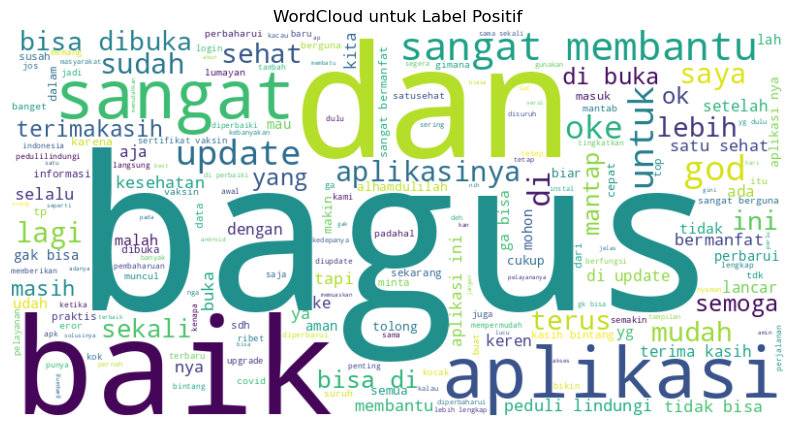

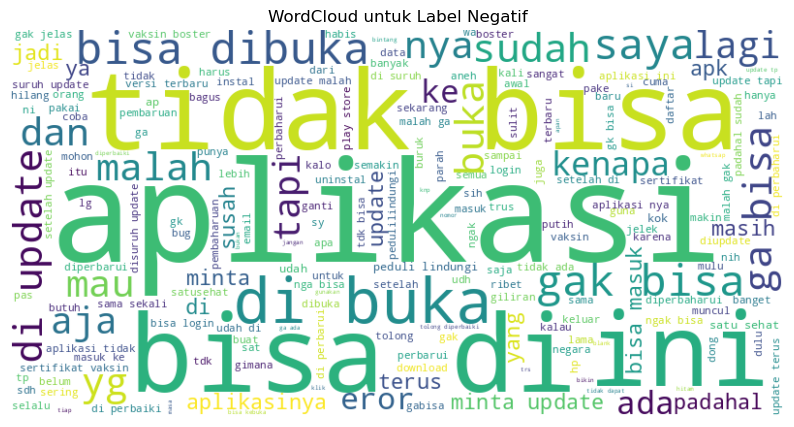

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Pisahkan data berdasarkan label positif (1) dan negatif (0)
data_positif = data[data['label'] == 1]
data_negatif = data[data['label'] == 0]

# Gabungkan semua dokumen menjadi satu teks untuk masing-masing label
all_text_positif = ' '.join(data_positif['Review'].explode().dropna())
all_text_negatif = ' '.join(data_negatif['Review'].explode().dropna())

# Buat objek WordCloud untuk label positif
wordcloud_positif = WordCloud(width=800, height=400, background_color='white').generate(all_text_positif)

# Buat objek WordCloud untuk label negatif
wordcloud_negatif = WordCloud(width=800, height=400, background_color='white').generate(all_text_negatif)

# Tampilkan WordCloud untuk label positif
plt.figure(figsize=(10, 6))
plt.title('WordCloud untuk Label Positif')
plt.imshow(wordcloud_positif, interpolation='bilinear')
plt.axis('off')
plt.show()

# Tampilkan WordCloud untuk label negatif
plt.figure(figsize=(10, 6))
plt.title('WordCloud untuk Label Negatif')
plt.imshow(wordcloud_negatif, interpolation='bilinear')
plt.axis('off')
plt.show()


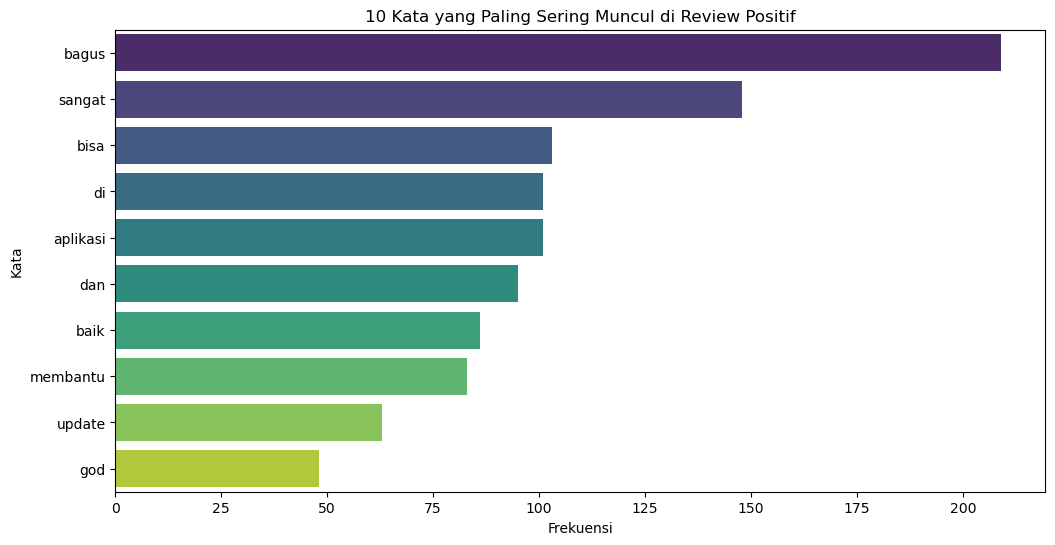

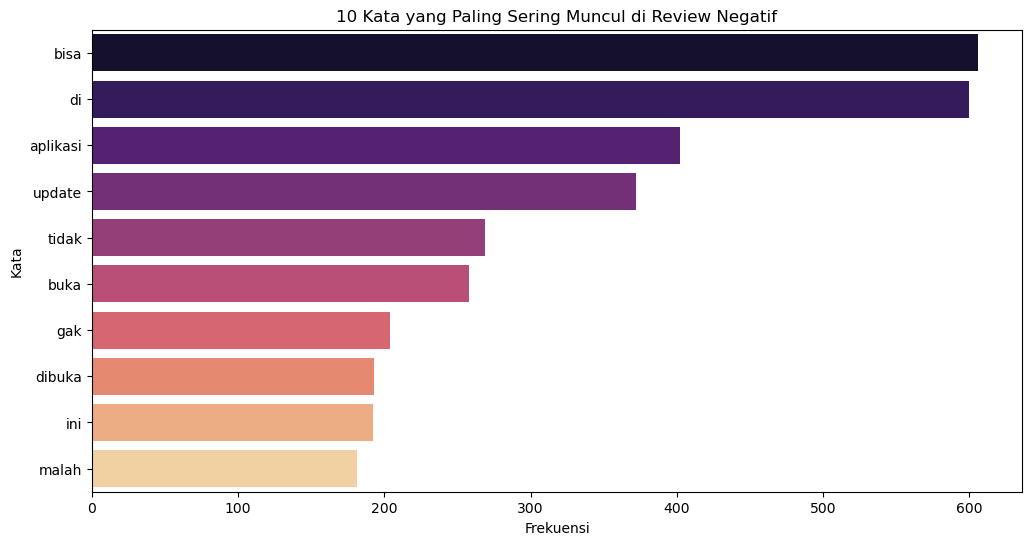

In [16]:
import re
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Hitung frekuensi kata-kata
word_freq_positif = Counter(all_text_positif.split())
word_freq_negatif = Counter(all_text_negatif.split())

# Konversi ke DataFrame untuk visualisasi
df_positif = pd.DataFrame(word_freq_positif.items(), columns=['Kata', 'Frekuensi'])
df_negatif = pd.DataFrame(word_freq_negatif.items(), columns=['Kata', 'Frekuensi'])

# Sortir berdasarkan frekuensi
df_positif = df_positif.sort_values(by='Frekuensi', ascending=False).head(10)
df_negatif = df_negatif.sort_values(by='Frekuensi', ascending=False).head(10)

# Plot diagram batang untuk kata-kata yang paling sering muncul di label positif
plt.figure(figsize=(12, 6))
sns.barplot(x='Frekuensi', y='Kata', data=df_positif, palette='viridis')
plt.title('10 Kata yang Paling Sering Muncul di Review Positif')
plt.show()

# Plot diagram batang untuk kata-kata yang paling sering muncul di label negatif
plt.figure(figsize=(12, 6))
sns.barplot(x='Frekuensi', y='Kata', data=df_negatif, palette='magma')
plt.title('10 Kata yang Paling Sering Muncul di Review Negatif')
plt.show()


# Tahap text pre-processing selesai